In [387]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [388]:
stock='CIPLA.NS'
data=yf.download(stock,'2021-08-28','2023-08-25',interval='1h')

[*********************100%***********************]  1 of 1 completed


In [389]:
data['High-Low'] = data['High'] - data['Low']
data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis=1, inplace=True)

period = 14

data['ATR'] = data['TrueRange'].rolling(period).mean()
data.drop('TrueRange', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2021-08-30 09:15:00+05:30,920.450012,930.000000,920.450012,929.200012,929.200012,0,NaN
2021-08-30 10:15:00+05:30,929.400024,930.000000,926.000000,926.599976,926.599976,196087,NaN
2021-08-30 11:15:00+05:30,926.250000,934.900024,925.299988,934.400024,934.400024,308104,NaN
2021-08-30 12:15:00+05:30,933.900024,936.500000,933.400024,935.400024,935.400024,256002,NaN
2021-08-30 13:15:00+05:30,935.150024,936.200012,934.549988,935.049988,935.049988,222352,NaN
...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,1230.099976,1231.449951,1222.599976,1225.250000,1225.250000,94437,6.907122
2023-08-24 12:15:00+05:30,1225.250000,1227.699951,1222.750000,1225.849976,1225.849976,73215,7.099976
2023-08-24 13:15:00+05:30,1225.849976,1227.900024,1224.500000,1226.400024,1226.400024,73473,7.132124


In [390]:
data['Typical']=(data['High']+data['Low']+data['Close'])/3
data['Vwap'] = (data['Typical'] * data['Volume']).cumsum() / data['Volume'].cumsum()

data

,Open,High,Low,Close,Adj Close,Volume,ATR,Typical,Vwap
Datetime,,,,,,,,,
2021-08-30 09:15:00+05:30,920.450012,930.000000,920.450012,929.200012,929.200012,0,NaN,926.550008,NaN
2021-08-30 10:15:00+05:30,929.400024,930.000000,926.000000,926.599976,926.599976,196087,NaN,927.533325,927.533325
2021-08-30 11:15:00+05:30,926.250000,934.900024,925.299988,934.400024,934.400024,308104,NaN,931.533346,929.977681
2021-08-30 12:15:00+05:30,933.900024,936.500000,933.400024,935.400024,935.400024,256002,NaN,935.100016,931.702675
2021-08-30 13:15:00+05:30,935.150024,936.200012,934.549988,935.049988,935.049988,222352,NaN,935.266663,932.509213
...,...,...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,1230.099976,1231.449951,1222.599976,1225.250000,1225.250000,94437,6.907122,1226.433309,990.144534
2023-08-24 12:15:00+05:30,1225.250000,1227.699951,1222.750000,1225.849976,1225.849976,73215,7.099976,1225.433309,990.166606
2023-08-24 13:15:00+05:30,1225.849976,1227.900024,1224.500000,1226.400024,1226.400024,73473,7.132124,1226.266683,990.188831


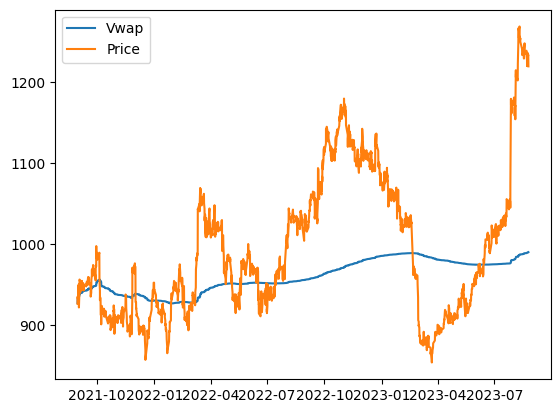

In [391]:
plt.plot(data['Vwap'],label='Vwap')
plt.plot(data['Typical'],label='Price')
plt.legend()

In [392]:
atr_multiplier = 1.2

data['UpperBand'] = data['Typical'] + atr_multiplier * data['ATR']
data['LowerBand'] = data['Typical'] - atr_multiplier * data['ATR']

In [393]:
buy_signals=[]
sell_signals=[]
signals=[]

status=''
for i in range(len(data)):
    if (data['Typical'][i] < data['LowerBand'][i] or data['Close'][i] < data['Vwap'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append(('SELL'))
        status = 'SELL'
    elif (data['Typical'][i] > data['UpperBand'][i] or data['Close'][i] > data['Vwap'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append(('BUY'))
        status = 'BUY'
    else:
        signals.append(('NONE'))

print(sell_signals)
print(buy_signals)
print(signals)

[1, 6, 17, 32, 100, 175, 363, 438, 595, 599, 804, 823, 871, 895, 1120, 1162, 1173, 1238, 1361, 1380, 1522, 2562, 3052, 3061, 3090]
[2, 8, 21, 33, 106, 361, 412, 566, 598, 718, 814, 870, 881, 896, 1121, 1163, 1232, 1245, 1362, 1514, 1525, 3050, 3059, 3089, 3091]
['NONE', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE

In [394]:
investment=100000 #100k
number_of_stocks=investment//(data['Close'][0])
in_hand = investment - number_of_stocks * data['Close'][0]
returns=[]

for i in range(len(signals)):
    if signals[i][1]=='BUY':
        temp = in_hand // data['Close'][i]
        in_hand -= temp * data['Close'][i]
        combined_number_of_stocks += temp
    elif signals[i][1]=='SELL':
        in_hand += combined_number_of_stocks * data['Close'][i]
        combined_number_of_stocks = 0
    returns.append(in_hand+number_of_stocks*data['Close'][i])

print("The return on investing 100000 rupees is:",returns[-1])

combined_percentage_returns=format((((returns[-1])-(investment))/investment)*(100),".2f")
print("The percentage return in case of combined strategy is:",combined_percentage_returns,"%")

The return on investing 100000 rupees is: 131169.09869384766
The percentage return in case of combined strategy is: 31.17 %


In [395]:
pnl=[]
for i in range(len(returns)):
    pnl.append(((returns[i]-investment)/investment)*100)
pnl[-1]

31.16909869384766

In [396]:
sharpe=(np.mean(pnl)-0.03)/np.std(pnl)
sharpe

0.7528832630735167